In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load your dataset into a pandas DataFrame

dataset = pd.read_csv('hypertension_data.csv')

In [4]:
dataset.head()

,PATIENT,SYSTOLIC (mmhg),DIASTOLIC (mmhg),WEIGHT,AGE,HYPERTENSION
0,1,120,90,61,23,0
1,2,125,90,80,33,0
2,3,150,110,40,29,1
3,4,120,85,59,23,0
4,5,160,120,50,45,1


In [15]:
print(dataset.describe())

          PATIENT  SYSTOLIC (mmhg)  DIASTOLIC (mmhg)      WEIGHT         AGE  \
count  199.000000       199.000000        199.000000  199.000000  199.000000   
mean   100.150754       142.678392         97.492462   56.824121   47.552764   
std     57.813505        29.216141         16.954148   14.293964   20.048577   
min      1.000000        90.000000         47.000000   30.000000   15.000000   
25%     50.500000       120.000000         87.000000   45.000000   30.000000   
50%    100.000000       140.000000        100.000000   53.000000   45.000000   
75%    149.500000       165.000000        110.000000   70.000000   59.500000   
max    200.000000       200.000000        140.000000   85.000000   97.000000   

       HYPERTENSION  
count    199.000000  
mean       0.547739  
std        0.498971  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


In [5]:
# Separate independent variables (features) and dependent variable (target)
X = dataset[['WEIGHT', 'AGE']]  # Independent variables
y = dataset['HYPERTENSION']         # Dependent variable

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the logistic regression model
logistic_reg_model = LogisticRegression()

In [8]:
# Fit the model to the training data
logistic_reg_model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Make predictions on the testing data
y_pred = logistic_reg_model.predict(X_test)

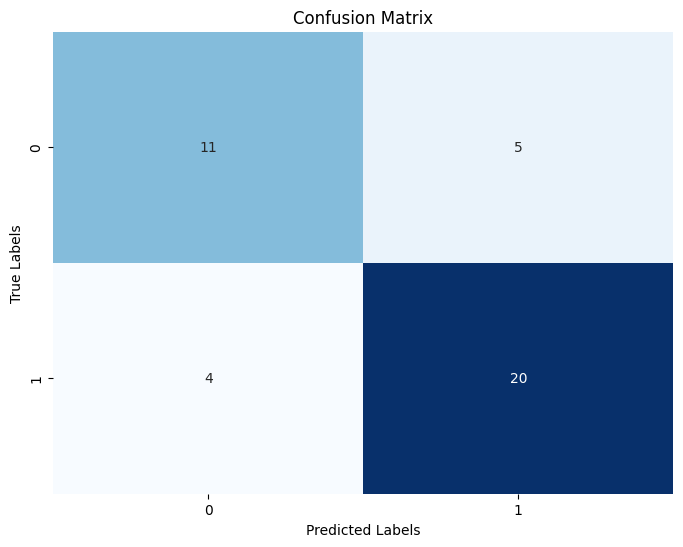


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.80      0.83      0.82        24

    accuracy                           0.78        40
   macro avg       0.77      0.76      0.76        40
weighted avg       0.77      0.78      0.77        40



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have y_test and y_pred
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


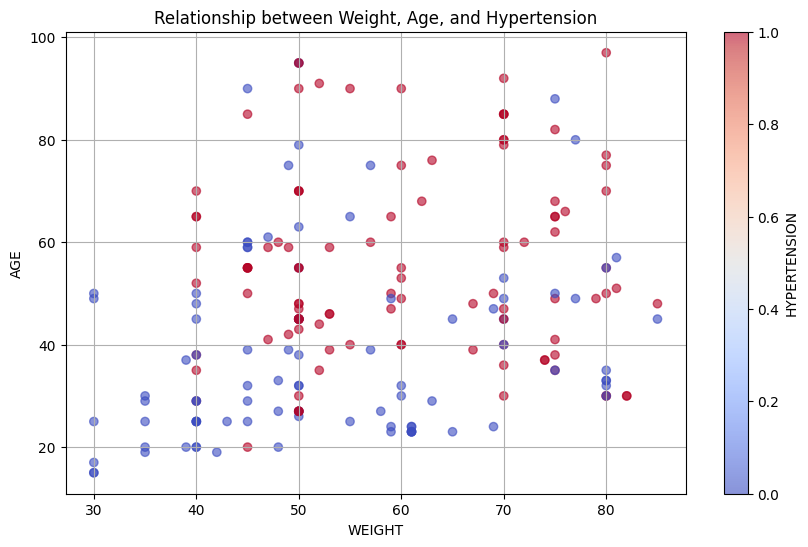

In [11]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(dataset['WEIGHT'], dataset['AGE'], c=dataset['HYPERTENSION'], cmap='coolwarm', alpha=0.6)
plt.xlabel('WEIGHT')
plt.ylabel('AGE')
plt.title('Relationship between Weight, Age, and Hypertension')
plt.colorbar(label='HYPERTENSION')
plt.grid(True)
plt.show()

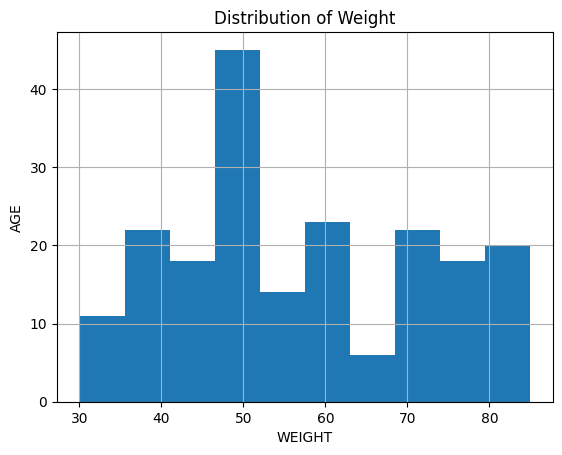

Coefficients: [[0.0152308  0.04290168]]
Intercept: [-2.67923698]
Odds Ratio: [[1.01534738 1.04383526]]


In [14]:
# Visualization
dataset['WEIGHT'].hist()
plt.title('Distribution of Weight')
plt.xlabel('WEIGHT')
plt.ylabel('AGE')
plt.show()

coef = logistic_reg_model.coef_
intercept = logistic_reg_model.intercept_
print("Coefficients:", coef)
print("Intercept:", intercept)

# Calculate odds ratios
odds_ratio = np.exp(coef)
print("Odds Ratio:", odds_ratio)

In [24]:
test_age = 35
test_weight = 30  # in kilograms

test_sample = np.array([[test_age, test_weight]])
prediction = logistic_reg_model.predict(test_sample)

if prediction[0] == 0:
    result = "No hypertension"
else:
    result = "Hypertension"

print(f"Based on the provided age and weight, the model predicts: {result}")


Based on the provided age and weight, the model predicts: No hypertension


c:\Users\IBRAHIM UMAR FARUK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
